In [58]:
import moviepy.editor as mp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal
import wave, sys
import audio2numpy as a2n
from audio2numpy import open_audio
from scipy.fft import fft, ifft
from scipy.io import wavfile
from scipy.io.wavfile import read
import scipy.io
from pydub import AudioSegment
import pandas as pd

In [5]:
### importing video of interest
video = mp.VideoFileClip(r"\Users\greenhouselab\Documents\Rubi\typingtask_pilotdata\GX010029.MP4")

In [6]:
# ### extracting audio file from video
# audio = video.audio.write_audiofile(r"isaiah_frontal1.wav")

In [7]:
### defining audio file location
audio_file = r'/Users/greenhouselab/Documents/Rubi/video_clipping/isaiah_frontal1.wav'

In [8]:
### turning stereo audio file to mono
audio = AudioSegment.from_wav(audio_file)
audio = audio.set_channels(1)
audio = audio.export('/Users/greenhouselab/Documents/Rubi/video_clipping/.wav', format="wav")

In [9]:
### making numpy array from audio file
sample_rate, samples = wavfile.read(audio)

In [72]:
sample_rate

44100

In [10]:
samples

array([  0,   0,   0, ..., 318, 346, 377], dtype=int16)

In [71]:
len(samples)

23440914

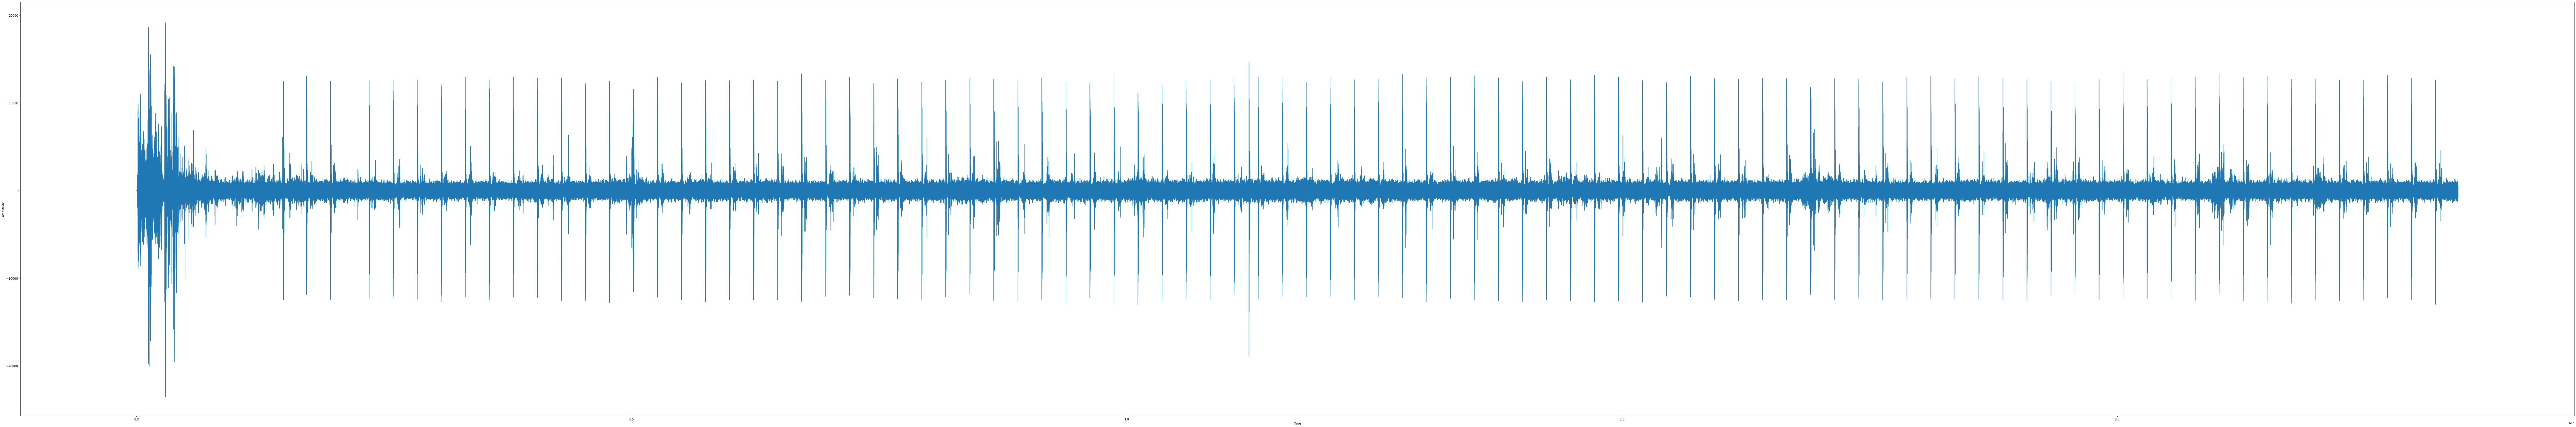

In [87]:
plt.rcParams["figure.figsize"] = [120, 20]
plt.rcParams["figure.autolayout"] = True
input_data = samples
plt.plot(input_data)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.ylim()
plt.xlim()
plt.show()

In [70]:
# run peak detection to see if there are 120 peaks here

indexes, _ = scipy.signal.find_peaks(samples, height=7, distance=2.1)
print('Peaks are: %s' % (indexes))

Peaks are: [    8967     8972     8976 ... 23440788 23440800 23440808]


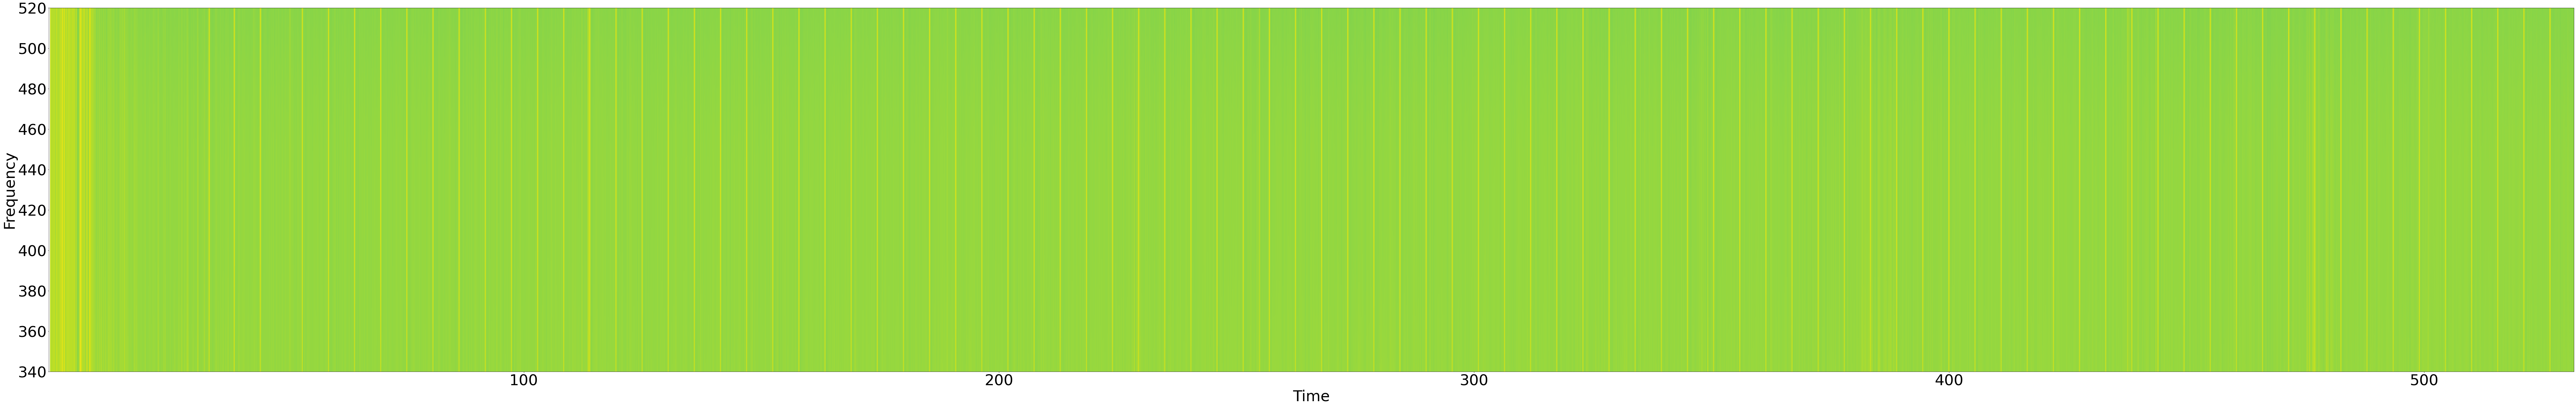

In [154]:
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(samples, Fs=sample_rate)
plt.rcParams["figure.figsize"] = [12, 6]
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim(340, 520)
plt.show()

In [155]:
## need to go through the row that correponds with 440hz (2 and 3 are closest) in powerspectrum, and time stamps of peaks. 

In [189]:
time[1]

0.005804988662131519

In [37]:
powerSpectrum[3]

array([ 0.        ,  0.        ,  0.        , ..., 50.98064352,
       10.71275098, 68.3617863 ])

In [46]:
# def find_beep(freq):
#     lowA = pd.()
#     for x in freq:
#         lowA.append(x)

In [53]:
# find_beep(powerSpectrum[3])

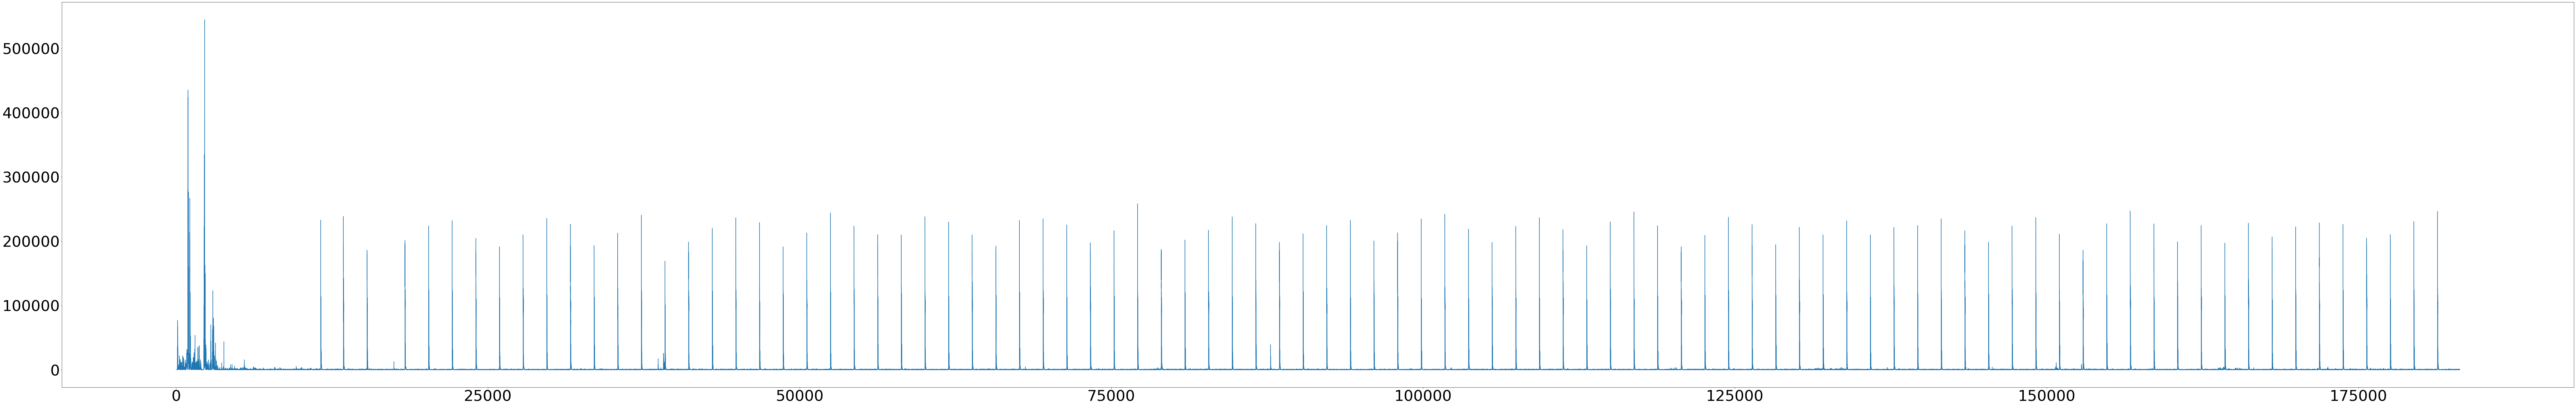

<Figure size 8640x1440 with 0 Axes>

In [117]:
lowA = np.array(powerSpectrum[2])
# plt.rcParams.update({'font.size': 50})
plt.plot(lowA)
plt.figure(figsize=(120, 20))
plt.show()

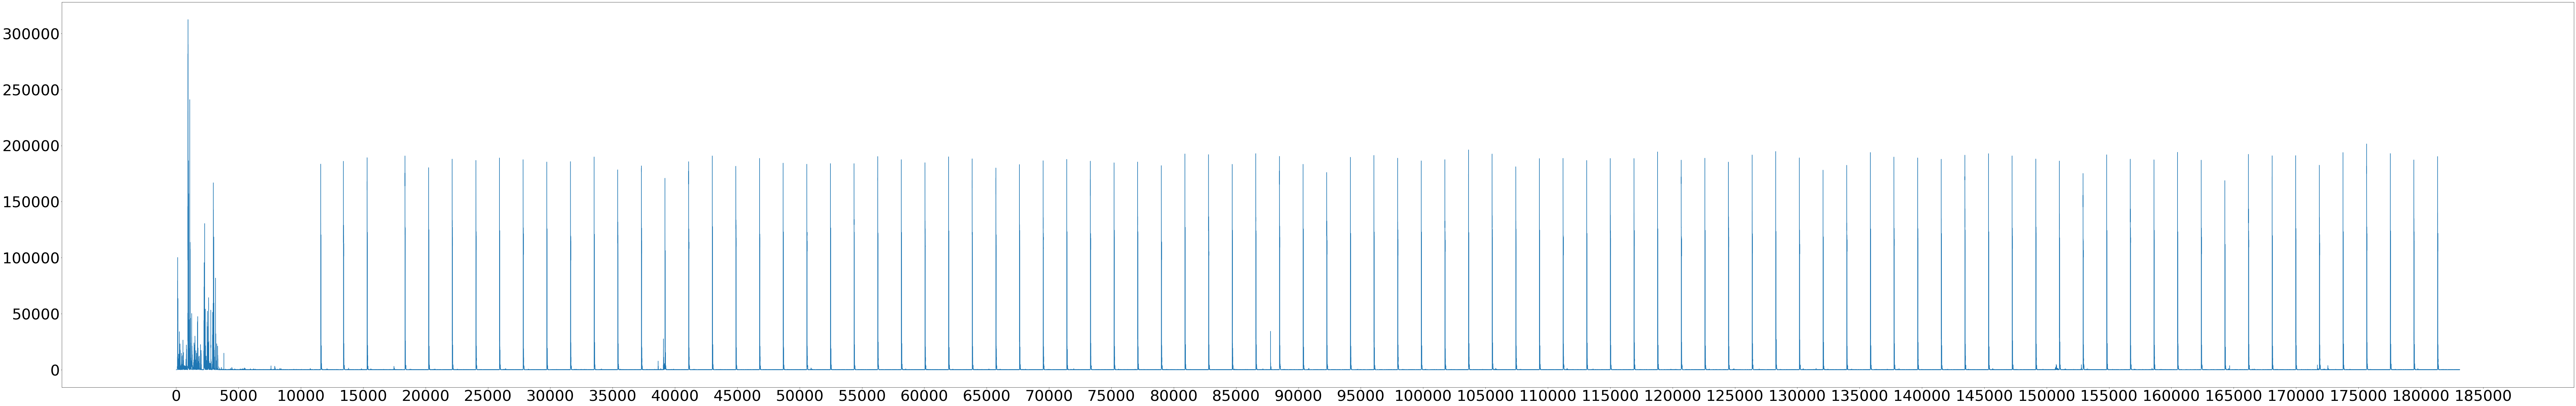

In [144]:
highA = np.array(powerSpectrum[3])
plt.plot(highA)
# plt.figure(figsize=(120, 20))
plt.xlim()
plt.xticks(np.arange(0, 190000, step=5000))
plt.show()

In [220]:
indexes, _ = scipy.signal.find_peaks(highA, height=150000, distance=120)
len(indexes)

93

In [288]:
## get time stamps for each peak from 'time' output of spectrogram
def find_peak_times(): 
    peak_times = np.empty(np.shape(indexes))
    for idx, x in enumerate(indexes):
        stamp = time[x]
        peak_times[idx] = stamp
    return peak_times

In [303]:
cut_times = (find_peak_times()).tolist()

In [318]:
# def cut_at_peaks():
#     clips = pd.DataFrame()
#     for cut in cut_times:
#         clip = video.subclip(cut, cut+3.5) ## WHERE YOU LEFT OFF
#         clips.append(clip)
#     print(clips)
    # for idx, data in clips:
    #     print(idx)
    #     data.write_videofile("trial_%" %(idx), threads=4, fps=24,
    #                            codec=vcodec,
    #                            preset=compression,
    #                            ffmpeg_params=["-crf",videoquality])

    # video.close()

In [343]:
cut_times

[2.766077097505669,
 3.175328798185941,
 8.658140589569161,
 33.66603174603175,
 38.94857142857143,
 44.44589569160998,
 53.27238095238095,
 58.760997732426304,
 64.26702947845806,
 69.77015873015873,
 75.26748299319728,
 80.7677097505669,
 86.27083900226758,
 91.78848072562359,
 97.2887074829932,
 102.7889342403628,
 108.29206349206349,
 113.78938775510204,
 119.28961451247166,
 124.79274376417233,
 130.28426303854874,
 135.79319727891158,
 141.29342403628118,
 146.79365079365078,
 152.28807256235828,
 157.79990929705215,
 163.2972335600907,
 168.79746031746032,
 174.29768707482992,
 179.79791383219955,
 185.29814058956916,
 190.7983673469388,
 196.29569160997733,
 201.80172335600906,
 207.3019501133787,
 212.8021768707483,
 218.3024036281179,
 223.7968253968254,
 229.3057596371882,
 234.80598639455783,
 240.30621315192744,
 245.80063492063493,
 251.30956916099774,
 256.80979591836734,
 262.3071201814059,
 267.80734693877554,
 273.3104761904762,
 278.8107029478458,
 284.3109297052154,

In [344]:
for idx, cut in enumerate(cut_times):
    clip = video.subclip(cut, cut+3.5)
    name = 'trial_%s.mp4' % idx
    clip.write_videofile(name)

                                                                                                                       
                                                                                                                    

chunk:   1%|▊                                                            | 1/78 [19:01<24:24:20, 1141.05s/it, now=None]

                                                                                                                       
                                                                                                                    

chunk:   1%|▊                                                            | 1/78 [19:01<24:24:21, 1141.06s/it, now=None]

chunk:   1%|▊                                                             | 1/78 [16:29<21:09:17, 989.06s/it, now=None]

Moviepy - Building video trial_0.mp4.
MoviePy - Writing audio in trial_0TEMP_MPY_wvf_snd.mp3





chunk:   0%|                                                                          | 0/78 [00:00<?, ?it/s, now=None]


                                                                                                                       
                                                                                                                    

chunk:   1%|▊                                                            | 1/78 [19:01<24:24:30, 1141.17s/it, now=None]

                                                                                                                       
                                                                                                                    

chunk:   1%|▊                                                            | 1/78 [19:01<24:24:30, 1141.17s/it, now=None]

chunk:   1%|▊                                                             | 1/78 [16:29<21:09:25, 989.17s/it, now=None]

MoviePy - Done.
Moviepy - Writing video trial_0.mp4






t:   0%|                                                                             | 0/420 [00:00<?, ?it/s, now=None]


t:   1%|▉                                                                    | 6/420 [00:00<00:08, 50.71it/s, now=None]


t:   3%|█▉                                                                  | 12/420 [00:00<00:07, 55.72it/s, now=None]


t:   4%|██▉                                                                 | 18/420 [00:00<00:07, 54.62it/s, now=None]


t:   6%|███▉                                                                | 24/420 [00:00<00:07, 52.84it/s, now=None]


t:   7%|████▊                                                               | 30/420 [00:00<00:07, 52.92it/s, now=None]


t:   9%|█████▊                                                              | 36/420 [00:00<00:07, 53.28it/s, now=None]


t:  10%|██████▊                                                             | 42/420 [00:00<00:07, 53.49it/s, now=None]


t:  11%|███████▊     

Moviepy - Done !
Moviepy - video ready trial_0.mp4


                                                                                                                       
                                                                                                                    

chunk:   1%|▊                                                            | 1/78 [19:14<24:41:35, 1154.49s/it, now=None]

                                                                                                                       
                                                                                                                    

chunk:   1%|▊                                                            | 1/78 [19:14<24:41:36, 1154.50s/it, now=None]

chunk:   1%|▊                                                            | 1/78 [16:42<21:26:32, 1002.49s/it, now=None]

Moviepy - Building video trial_1.mp4.
MoviePy - Writing audio in trial_1TEMP_MPY_wvf_snd.mp3





chunk:   0%|                                                                          | 0/78 [00:00<?, ?it/s, now=None]


                                                                                                                       
                                                                                                                    

chunk:   1%|▊                                                            | 1/78 [19:14<24:41:43, 1154.59s/it, now=None]

                                                                                                                       
                                                                                                                    

chunk:   1%|▊                                                            | 1/78 [19:14<24:41:44, 1154.61s/it, now=None]

chunk:   1%|▊                                                            | 1/78 [16:42<21:26:40, 1002.60s/it, now=None]

MoviePy - Done.
Moviepy - Writing video trial_1.mp4






t:   0%|                                                                             | 0/420 [00:00<?, ?it/s, now=None]


t:   1%|▊                                                                    | 5/420 [00:00<00:09, 43.16it/s, now=None]


t:   3%|█▊                                                                  | 11/420 [00:00<00:07, 51.85it/s, now=None]


t:   4%|██▊                                                                 | 17/420 [00:00<00:07, 52.24it/s, now=None]


t:   5%|███▋                                                                | 23/420 [00:00<00:07, 55.07it/s, now=None]


t:   7%|████▋                                                               | 29/420 [00:00<00:07, 51.58it/s, now=None]


t:   8%|█████▋                                                              | 35/420 [00:00<00:07, 51.16it/s, now=None]


t:  10%|██████▋                                                             | 41/420 [00:00<00:07, 51.36it/s, now=None]


t:  11%|███████▌     

Moviepy - Done !
Moviepy - video ready trial_1.mp4


                                                                                                                       
                                                                                                                    

chunk:   1%|▊                                                            | 1/78 [19:27<24:58:52, 1167.95s/it, now=None]

                                                                                                                       
                                                                                                                    

chunk:   1%|▊                                                            | 1/78 [19:27<24:58:52, 1167.95s/it, now=None]

chunk:   1%|▊                                                            | 1/78 [16:55<21:43:48, 1015.95s/it, now=None]

Moviepy - Building video trial_2.mp4.
MoviePy - Writing audio in trial_2TEMP_MPY_wvf_snd.mp3





chunk:   0%|                                                                          | 0/78 [00:00<?, ?it/s, now=None]

AttributeError: 'NoneType' object has no attribute 'stdout'